# Marketing insights for E-commerce company

Business Objective:
The e-commerce company is expecting below analysis using the data
1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
- Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

2. Perform Detailed exploratory analysis
- Understanding how many customers acquired every month
- Understand the retention of customers on month on month basis
- How the revenues from existing/new customers on month on month basis
- How the discounts playing role in the revenues?
- Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
- Understand the trends/seasonality of sales by category, location, month etc…
- How number order varies and sales with different days?
- Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
- How marketing spend is impacting on revenue?
- Which product was appeared in the transactions?
- Which product was purchased mostly based on the quantity?

3. Perform Customer Segmentation
- Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
- Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

4. Predict Customer Lifetime Value (Low Value/Medium Value/High Value)
- First define dependent variable with categories low value, medium value, high value using customer revenue.
- Then perform Classification model

5. Cross-Selling (Which products are selling together)
- You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60
days, 60-90 days, 90+ days)
- For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

7. Perform cohort analysis by defining below cohorts
- Customers who started in each month and understand their behaviour
- Which Month cohort has maximum retention?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Load and understand data

In [2]:
customer_df = pd.read_excel('dataset/CustomersData.xlsx')
discountCoupons_df = pd.read_csv('dataset/Discount_Coupon.csv')
marketing_spending_df = pd.read_csv('dataset/Marketing_Spend.csv')
online_sales_df = pd.read_csv('dataset/Online_Sales.csv')
tax_amount_df = pd.read_excel('dataset/Tax_amount.xlsx')

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [4]:
discountCoupons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
marketing_spending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
online_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [7]:
tax_amount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


## 1. Calculate Invoice amount or sale_amount or revenue for each transaction and item level
- Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

<Axes: title={'center': 'Figure-1a. histogram for coupon use'}, xlabel='Coupon_Status', ylabel='Count'>

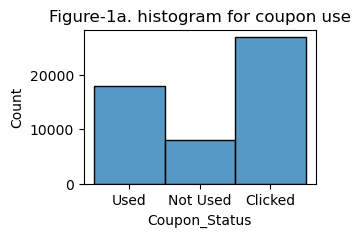

In [8]:
## online_sales_df has Quantity, Avg_Price, Delivery_Charges
## discountCoupons_df has Discount_pct
## tax_amount_df has GST
## What is coupon status?
plt.figure(figsize=(3,2))
plt.title("Figure-1a. histogram for coupon use")
sns.histplot(online_sales_df.Coupon_Status)


In [9]:
print(online_sales_df.columns)
print(discountCoupons_df.columns)
online_sales_df.info()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')
Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null

online_sales_df Transaction_Date has nulls = 0


Text(0.5, 1.0, 'Figure-1b. Histogram for transaction dates (n=52924)')

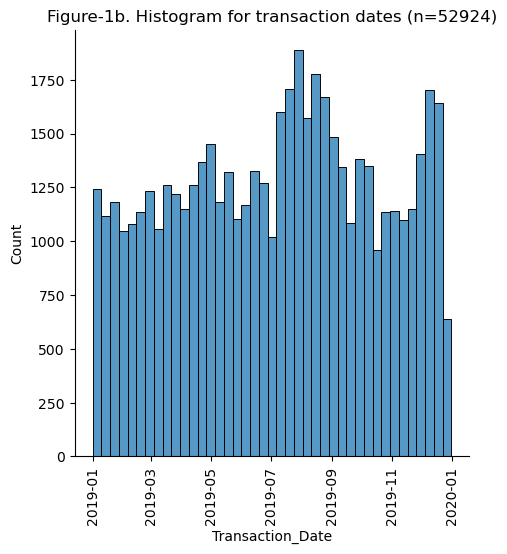

In [10]:
## convert Transaction_Date from online_sales_df to date
online_sales_df['Transaction_Date'] = pd.to_datetime(online_sales_df['Transaction_Date'], 
                                                  format='%Y%m%d')
print(f'online_sales_df Transaction_Date has nulls = {online_sales_df[online_sales_df['Transaction_Date'].isna()].shape[0]}')
sns.displot(online_sales_df['Transaction_Date'])
plt.xticks(rotation=90)
plt.title(f"Figure-1b. Histogram for transaction dates (n={online_sales_df[online_sales_df['Transaction_Date'].notna()].shape[0]})")

In [11]:
### discountCoupons_df 'Product_Category ' has an extra whitespace !!!!!
print(f'online_sales_df column names = {online_sales_df.columns}')
print(f'discountCoupons_df column names = {discountCoupons_df.columns}')

online_sales_df column names = Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')
discountCoupons_df column names = Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')


In [12]:
discountCoupons_df.rename(columns={'Product_Category ':'Product_Category'}, inplace=True)

In [13]:
# the combining needs to be on the basis of Month and Product_Category
# Month needs to be derived from online_sales_df.Transaction_Date
online_sales_df['Month'] = online_sales_df['Transaction_Date'].dt.strftime('%B')

online_sales_coupons_combined = pd.merge(online_sales_df, discountCoupons_df, 
                                         on=['Product_Category','Month'], 
                                         how='left')
online_sales_coupons_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          4516 non-null   object        
 12  Discount_pct         4516 non-null   float64       
dtypes: datetime64[ns](1), float64(3

In [14]:
## Transaction_Date == Dransaction_Date !! 
## print((online_sales_coupons_combined['Transaction_Date'] == 
## online_sales_coupons_combined['Dransaction_Date']).value_counts(dropna=False))
## online_sales_coupons_combined.drop(columns = ['Dransaction_Date'], inplace=True)

In [15]:
## to this we need to attach GST (tax) from ## tax_amount_df table
tax_amount_df.columns

Index(['Product_Category', 'GST'], dtype='object')

In [16]:
online_sales_coupons_tax_combined = pd.merge(online_sales_coupons_combined, tax_amount_df, on=['Product_Category'], how='left')
print(online_sales_coupons_tax_combined.columns)
online_sales_coupons_tax_combined.info()

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64  

In [17]:
def create_histogram_collage(data, cols, nrows, ncols, title):
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 6))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

  for i, col in enumerate(cols):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    ax.hist(data[cols[i]], bins=10)  # Adjust bins as needed
    ax.set_title(cols[i])
  fig.suptitle(title)

  plt.show()

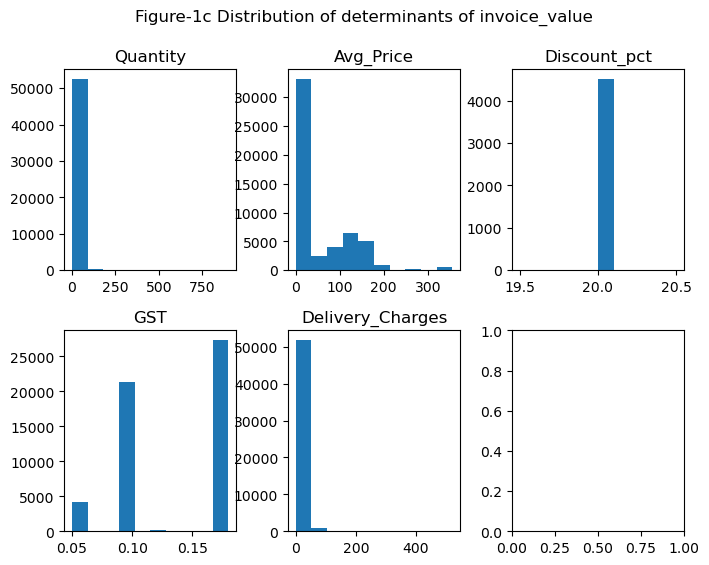

In [18]:
osct = online_sales_coupons_tax_combined.copy()
cols2plot = ['Quantity', 'Avg_Price', 'Discount_pct', 'GST', 'Delivery_Charges']
create_histogram_collage(osct, cols2plot, 2,3, "Figure-1c Distribution of determinants of invoice_value")

In [19]:
osct[cols2plot].describe()

,Quantity,Avg_Price,Discount_pct,GST,Delivery_Charges
count,52924.000000,52924.000000,4516.0,52924.000000,52924.000000
mean,4.497638,52.237646,20.0,0.137462,10.517630
std,20.104711,64.006882,0.0,0.045825,19.475613
min,1.000000,0.390000,20.0,0.050000,0.000000
25%,1.000000,5.700000,20.0,0.100000,6.000000
50%,1.000000,16.990000,20.0,0.180000,6.000000
75%,2.000000,102.130000,20.0,0.180000,6.500000
max,900.000000,355.740000,20.0,0.180000,521.360000


In [20]:
def check_null_0_NaN(df, col):
    print(f"{col} = 0 in {(df[col] == 0).sum()} rows")
    print(f"{col} is NaN in {df[col].isna().sum()} rows.")
    print(f"{col} is Null in {df[col].isnull().sum()} rows.")
    print(f"{col} varies from {min(osct[col])} to {max(osct[col])}")

for col in cols2plot:
    check_null_0_NaN(osct, col)

Quantity = 0 in 0 rows
Quantity is NaN in 0 rows.
Quantity is Null in 0 rows.
Quantity varies from 1 to 900
Avg_Price = 0 in 0 rows
Avg_Price is NaN in 0 rows.
Avg_Price is Null in 0 rows.
Avg_Price varies from 0.39 to 355.74
Discount_pct = 0 in 0 rows
Discount_pct is NaN in 48408 rows.
Discount_pct is Null in 48408 rows.
Discount_pct varies from nan to nan
GST = 0 in 0 rows
GST is NaN in 0 rows.
GST is Null in 0 rows.
GST varies from 0.05 to 0.18
Delivery_Charges = 0 in 162 rows
Delivery_Charges is NaN in 0 rows.
Delivery_Charges is Null in 0 rows.
Delivery_Charges varies from 0.0 to 521.36


_Discount_pct is interesting we need to not times/multiply it when it is 0, but first it needs to be converted to a fraction._

In [21]:
##Invoice Value =((Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges

osct['base_invoice'] = (osct['Quantity']*osct['Avg_Price'])
osct['price_with_discount'] = np.where(osct['Discount_pct'].isnull(), 
                                    osct['base_invoice'], 
                                    osct['base_invoice']*(1-(osct['Discount_pct']/100))
                               )

osct['discount_applied'] = osct['base_invoice'] - osct['price_with_discount']
osct['tax_applied'] = osct['price_with_discount']*osct['GST']

osct['invoice_value'] = (osct['price_with_discount']*(1+osct['GST']))+osct['Delivery_Charges']
osct['invoice_value_ifNoDiscount'] = (osct['base_invoice']*(1+osct['GST']))+osct['Delivery_Charges']
osct.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,base_invoice,price_with_discount,discount_applied,tax_applied,invoice_value,invoice_value_ifNoDiscount
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,NaN,NaN,0.10,153.71,153.71,0.0,15.371,175.581,175.581
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,NaN,NaN,0.10,153.71,153.71,0.0,15.371,175.581,175.581
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,NaN,NaN,0.10,2.05,2.05,0.0,0.205,8.755,8.755
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,NaN,NaN,0.18,87.65,87.65,0.0,15.777,109.927,109.927
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,NaN,NaN,0.18,16.50,16.50,0.0,2.970,25.970,25.970


Text(0.5, 1.0, 'Figure-1d Distribution of invoice value across sales')

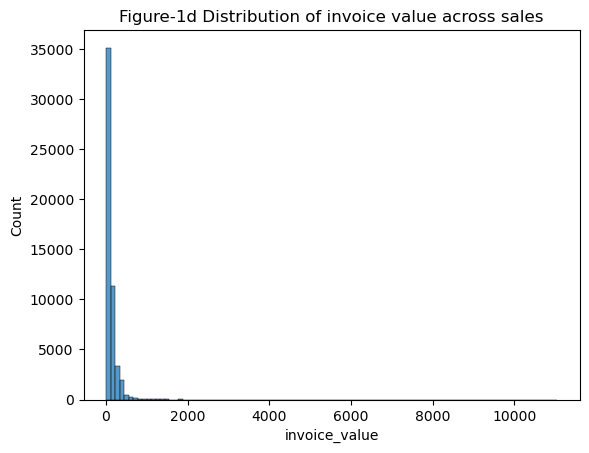

In [22]:
sns.histplot(osct['invoice_value'], bins=100)
plt.title("Figure-1d Distribution of invoice value across sales")

## 2. Perform Detailed exploratory analysis
- Understanding how many customers acquired every month
- Understand the retention of customers on month on month basis
- How the revenues from existing/new customers on month on month basis
- How the discounts playing role in the revenues?
- Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
- Understand the trends/seasonality of sales by category, location, month etc…
- How number order varies and sales with different days?
- Calculate the Revenue, Marketing spend, percentage of marketing spend out of
revenue, Tax, percentage of delivery charges by month.
- How marketing spend is impacting on revenue?
- Which product was appeared in the transactions?
- Which product was purchased mostly based on the quantity?

In [23]:
f2a = "Figure-2a Customer Acquisition per Month"
osct['Year'] = osct['Transaction_Date'].dt.year
osct['Month_num'] = osct['Transaction_Date'].dt.month
osct.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num'],
      dtype='object')

In [24]:
cust_acquired_on = pd.DataFrame(osct.groupby('CustomerID')['Transaction_Date'].min()).reset_index()
cust_acquired_on.rename(columns={'Transaction_Date': 'customer_acquisition_date'}, inplace=True)
osct = pd.merge(osct, cust_acquired_on, how='left', on='CustomerID')
osct.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,base_invoice,price_with_discount,discount_applied,tax_applied,invoice_value,invoice_value_ifNoDiscount,Year,Month_num,customer_acquisition_date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,153.71,153.71,0.0,15.371,175.581,175.581,2019,1,2019-01-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,153.71,153.71,0.0,15.371,175.581,175.581,2019,1,2019-01-01
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.10,2.05,2.05,0.0,0.205,8.755,8.755,2019,1,2019-01-01
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.18,87.65,87.65,0.0,15.777,109.927,109.927,2019,1,2019-01-01
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.18,16.50,16.50,0.0,2.970,25.970,25.970,2019,1,2019-01-01


In [25]:
cust_acquisition_per_month = osct[osct['customer_acquisition_date'] == osct['Transaction_Date']].groupby(['Month_num', 'Year'])['CustomerID'].nunique().reset_index()
cust_acquisition_per_month.rename(columns={'CustomerID': 'new_customers_acquired'}, inplace=True)
cust_acquisition_per_month.sort_values(by='Month_num', inplace=True)
print("Table-1 Customer aquisition per month")
display(cust_acquisition_per_month)
## cust_acquired_on

Table-1 Customer aquisition per month


,Month_num,Year,new_customers_acquired
0,1,2019,215
1,2,2019,96
2,3,2019,177
3,4,2019,163
4,5,2019,112
5,6,2019,137
6,7,2019,94
7,8,2019,135
8,9,2019,78
9,10,2019,87


In [26]:
def set_monthly_xticks(val):
    plt.xticks(ticks=range(val, val+12,1),
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
def set_day_of_week_ticks():
    plt.xticks(ticks=[0,1,2,3,4,5,6],
               labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

Text(0.5, 1.0, 'Figure-2a Customer Acquisition per Month')

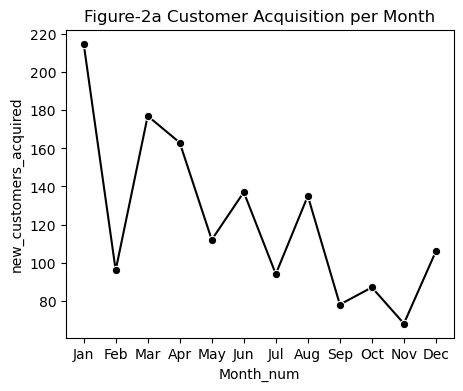

In [27]:
plt.figure(figsize=(5,4))
sns.lineplot(data=cust_acquisition_per_month, x='Month_num', y='new_customers_acquired', color='black', marker='o')
set_monthly_xticks(1)
plt.title(f2a)

In [28]:
osct['customer_acquisition_Month'] = osct['customer_acquisition_date'].dt.month
osct['customer_acquisition_Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [29]:
# Understand the retention of customers on month on month basis
# monthly retention = (unique_customers_this_month-new_customers_acquired)/customers_at_start_of_month
f2_aim = "Figure-2b Customer retention on monthly basis"

osct['new_existing_this_month'] = np.where(osct['customer_acquisition_Month'] == osct['Month_num'], 'new','existing')
osct_retention_df = osct[['CustomerID','Month_num','new_existing_this_month']].drop_duplicates().groupby(['Month_num','new_existing_this_month']).count().reset_index()
osct_retention_df.rename(columns={'CustomerID': 'CustomerCount'}, inplace=True)
## display(osct_retention_df)
## sns.barplot(data=osct_retention_df, x='Month_num', y='CustomerCount', hue='new_existing_this_month')
## plt.title("Figure-2b.1 Returning vs New Customers per month.")
## plt.xticks(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 
##            labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

Customer Retention Rate=((E−N)/S)×100
Where:

E = Number of customers at the end of the period (active ones, who ordered in the period)
N = Number of new customers acquired during the period
S = Number of customers at the start of the period ()

In [30]:
osct_retention_df = osct_retention_df.pivot(index=['Month_num'], columns='new_existing_this_month', values='CustomerCount').reset_index()

prior_month_customers = osct_retention_df['new'].to_list()
prior_month_customers.insert(0,0)

osct_retention_df['prior_month_customers'] = prior_month_customers[:-1]
osct_retention_df['total'] = osct_retention_df['existing'] + osct_retention_df['new']

osct_retention_df['retention_rate'] = (osct_retention_df['total']-osct_retention_df['new'])/osct_retention_df['prior_month_customers']

osct_retention_df.columns

Index(['Month_num', 'existing', 'new', 'prior_month_customers', 'total',
       'retention_rate'],
      dtype='object', name='new_existing_this_month')

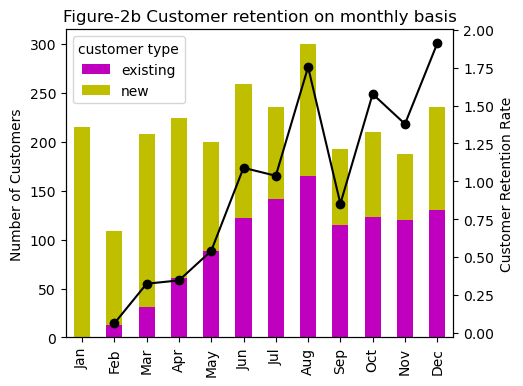

In [31]:
fig, ax1 = plt.subplots(figsize=(5,4))
osct_retention_df[['existing','new']].plot(kind='bar', stacked='True', ax=ax1, color=['m','y'])
ax2 = ax1.twinx() ## combining plots using twinx()
ax2.plot(osct_retention_df['retention_rate'], color='black', marker='o')
set_monthly_xticks(0)
ax1.set_ylabel("Number of Customers")
ax2.set_ylabel("Customer Retention Rate")
plt.title(f2_aim)
ax1.legend(title='customer type', loc='upper left')

In [32]:
f2c = "Figure 2c. Revenues from existing vs new customers"
## label existing and new customers per month

osct_summ = osct[['CustomerID','new_existing_this_month','Month_num', 'invoice_value']].groupby(['CustomerID','new_existing_this_month','Month_num'])['invoice_value'].sum().reset_index()

osct_summ = osct_summ.groupby(['Month_num','new_existing_this_month'])['invoice_value'].sum().reset_index()
osct_summ = osct_summ.pivot(index='Month_num', columns='new_existing_this_month', values='invoice_value').reset_index()
osct_summ['perc_revenue_from_return_customers'] = osct_summ['existing']*100/(osct_summ['new']+osct_summ['existing'])

display(osct_summ)

new_existing_this_month,Month_num,existing,new,perc_revenue_from_return_customers
0,1,NaN,508514.75510,NaN
1,2,49784.68560,347080.97140,12.544468
2,3,74933.23940,378271.82790,16.534069
3,4,201853.32260,290706.38430,40.980478
4,5,115067.71388,203488.58668,36.121625
5,6,160076.14910,236926.78480,40.321150
6,7,279620.57080,185668.44810,60.096104
7,8,263821.96240,243114.64760,52.042397
8,9,260016.98090,180805.44490,58.984518
9,10,230185.27790,265442.44060,46.443181


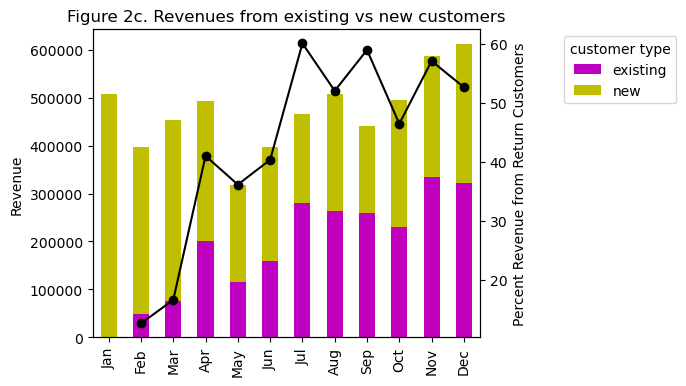

In [33]:
plt.clf
fig, ax1 = plt.subplots(figsize=(5,4))
osct_summ[['existing','new']].plot(kind='bar', stacked='True', ax=ax1, color=['m','y'])

ax2 = ax1.twinx() ## combining plots using twinx()
ax2.plot(osct_summ['perc_revenue_from_return_customers'], color='black', marker='o')

set_monthly_xticks(0)
ax1.set_ylabel("Revenue")
ax2.set_ylabel("Percent Revenue from Return Customers")
plt.title(f2c)
ax1.legend(title='customer type', loc='upper left', bbox_to_anchor=(1.2, 1))

In [34]:
## How the discounts playing role in the revenues?
fig2D = "Figure 2d. Revenues are lower in the May where Discounts are Offered"
osct['Discount_pct'] = osct['Discount_pct'].fillna(0)

osct_discount_summ = osct[['Month_num','Discount_pct','invoice_value']].groupby(['Month_num','Discount_pct'])['invoice_value'].sum().reset_index()
osct_discount_summ = osct_discount_summ.pivot(index='Month_num', columns='Discount_pct', values='invoice_value').reset_index()

osct_noDiscount_model = osct[['Month_num','invoice_value_ifNoDiscount']].groupby(['Month_num'])['invoice_value_ifNoDiscount'].sum().reset_index()

osct_discount_summ = pd.merge(osct_discount_summ, osct_noDiscount_model, how='left', on='Month_num')

## display(osct_discount_summ)

## osct_discount_summ.columns

Text(0.5, 1.0, 'Figure 2d. Revenues are lower in the May where Discounts are Offered')

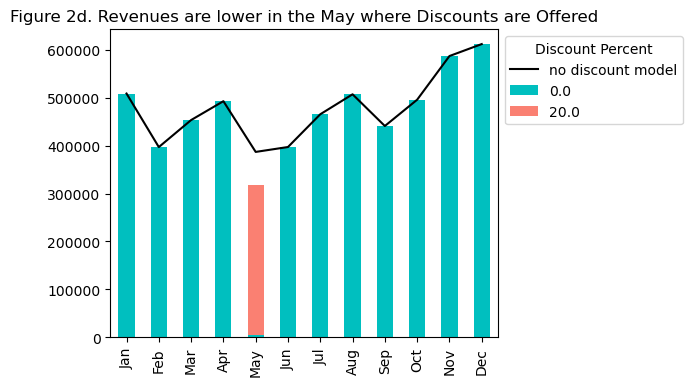

In [35]:
fig, ax1 =plt.subplots(figsize=(5,4))
osct_discount_summ[[0.0,20.0]].plot(kind='bar', stacked=True, ax=ax1, color=['c','salmon'])
ax1.plot(osct_discount_summ['invoice_value_ifNoDiscount'], color='black', label='no discount model')
plt.legend(title='Discount Percent', loc='upper left', bbox_to_anchor=(1, 1))
set_monthly_xticks(0)
plt.title(fig2D)

__It seems that discount did not have an effect on Sales and therefore Revenues went down that month. Now it is possible that that was one bad month or so. It is a statistical problem of having only 1 event!_

In [36]:
## Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…
osct['week'] = osct['Transaction_Date'].dt.isocalendar().week
osct['day'] = osct['Transaction_Date'].dt.dayofweek
osct.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num',
       'customer_acquisition_date', 'customer_acquisition_Month',
       'new_existing_this_month', 'week', 'day'],
      dtype='object')

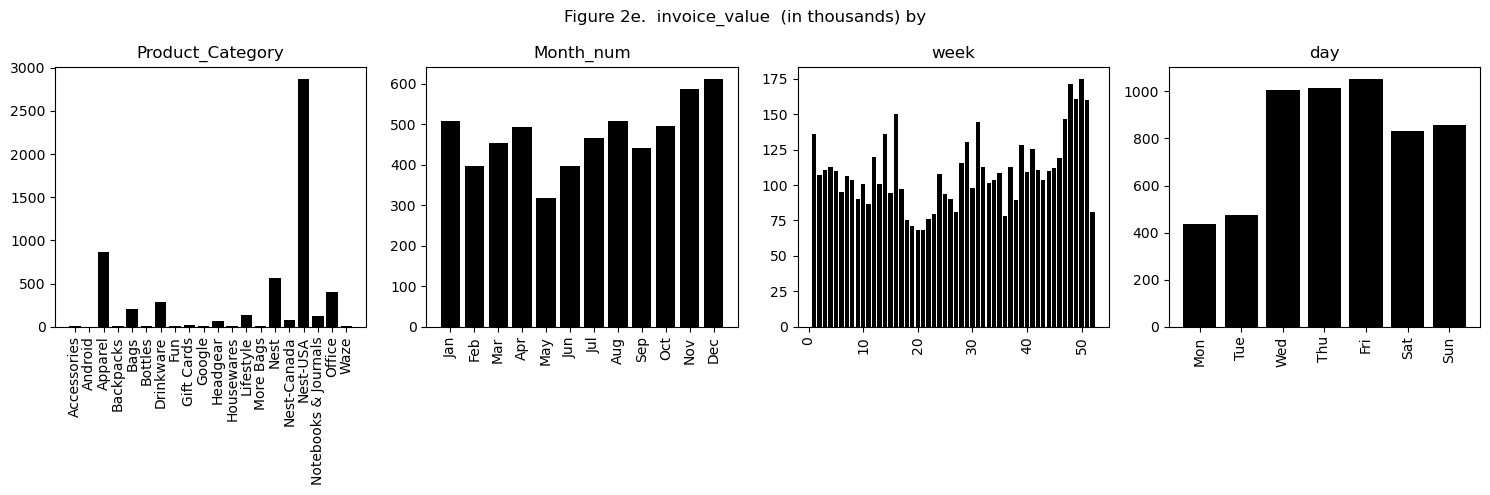

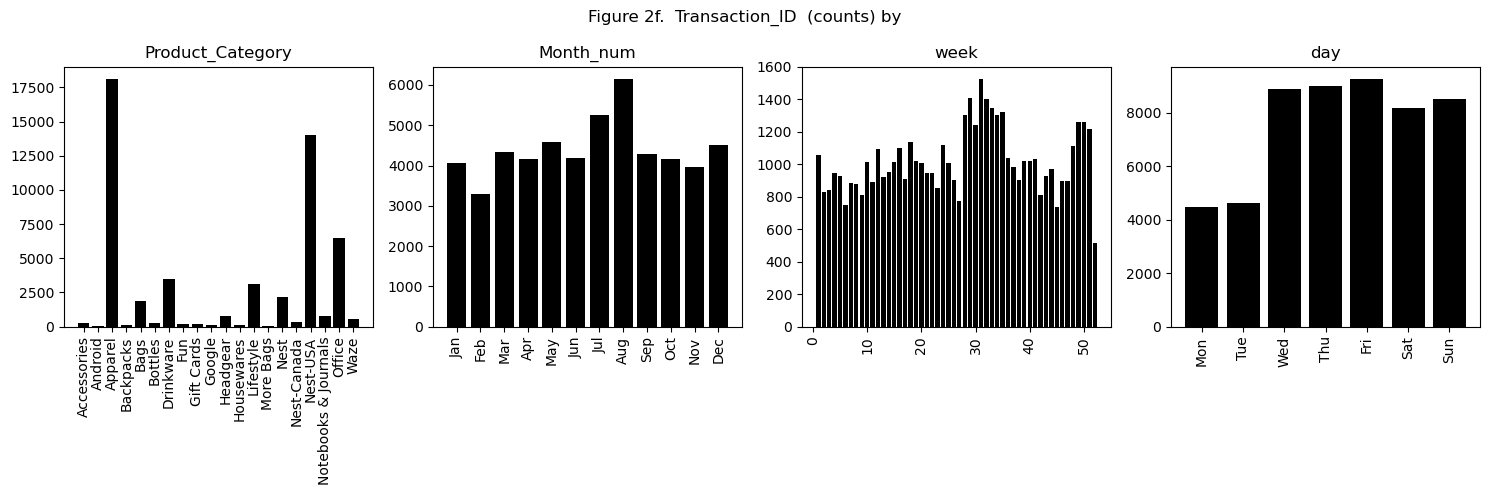

In [37]:
## Understand the trends/seasonality of sales by category, location, month etc…
grid_vals = ['Product_Category', 'Month_num', 'week', 'day']
by_gp = ['invoice_value', 'Transaction_ID','customer_acquisition_Month']
grid_len = len(grid_vals)
# revenue by 'Category'
def KPI_plot1(gp, val, div=1, sum_count = 'sum'):
    if sum_count == 'sum':
        df = osct.groupby([gp])[val].sum().reset_index()
    if sum_count == 'count':
        df = osct.groupby([gp])[val].count().reset_index()
    plt.bar(df[gp],df[val]/div, color='black')
    plt.xticks(rotation=90)
    plt.title(f"{gp}")
    
def KPI_grid(grid_vals, pre_title="", suff_title="", val='invoice_value', div=1, sum_count = 'sum'):
    plt.figure(figsize=(15, 5))
    plt.suptitle(f"{pre_title} {val} {suff_title} by")
    grid_len = len(grid_vals)
    ## rows, columns, current plot index 
    for i in range(grid_len):
        plt.subplot(1, grid_len, i+1)
        KPI_plot1(grid_vals[i],val, div,sum_count)
        if grid_vals[i] == 'Month_num':
            set_monthly_xticks(1)
        if grid_vals[i]=='day':
            set_day_of_week_ticks()

    plt.tight_layout()

KPI_grid(grid_vals, pre_title = "Figure 2e. ", suff_title=" (in thousands)", div=1000)
KPI_grid(grid_vals, val='Transaction_ID', pre_title = "Figure 2f. ", suff_title=" (counts)", sum_count='count')


### How number order varies and sales with different days?
- See Figure 2f Transaction Counts by day

In [38]:
# Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.
KPI_df = pd.DataFrame({ 'KPI': ['Total Revenue', 'Marketing Spend', 'Marketing Spend as Percent of Revenue', 'Total Tax', 'Delivery Charges as Percent of Revenue'],
                        'Value': [osct['invoice_value'].sum(), 
                                 marketing_spending_df['Offline_Spend'].sum()+marketing_spending_df['Online_Spend'].sum(),
                                (marketing_spending_df['Offline_Spend'].sum()+marketing_spending_df['Online_Spend'].sum())*100/osct['invoice_value'].sum(),
                                osct['tax_applied'].sum(),
                                osct['Delivery_Charges'].sum()*100/osct['invoice_value'].sum()]
                                  })

print("Table-2 The Essential KPIs")
display(KPI_df.style.format({'Value': '{:.2f}'}).hide(axis='index'))

Table-2 The Essential KPIs


KPI,Value
Total Revenue,5673745.82
Marketing Spend,1733546.47
Marketing Spend as Percent of Revenue,30.55
Total Tax,507107.48
Delivery Charges as Percent of Revenue,9.81


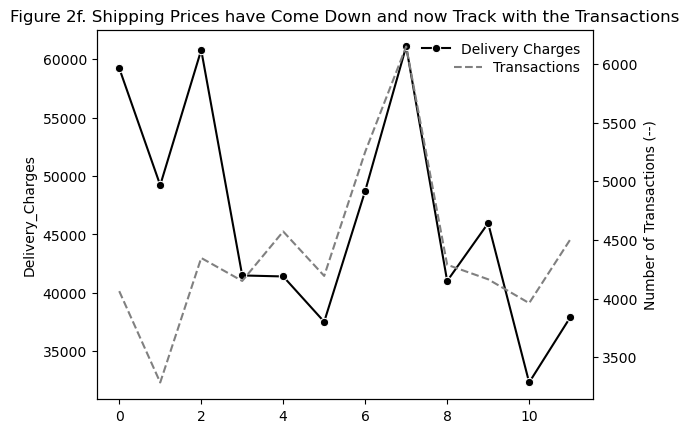

In [39]:
## Per month delivery charges
osct_delivery_monthly = osct.groupby(['Month_num'])['Delivery_Charges'].sum().reset_index()
osct_transaction_monthly = osct.groupby(['Month_num'])['Transaction_ID'].count().reset_index()
ax1 = sns.lineplot(osct_delivery_monthly['Delivery_Charges'], color='black', marker='o', label = "Delivery Charges")
ax2 = ax1.twinx()
ax2 = sns.lineplot(osct_transaction_monthly['Transaction_ID'], linestyle='--', color='gray', label = "Transactions")
plt.ylabel("Number of Transactions (--)")
plt.title("Figure 2f. Shipping Prices have Come Down and now Track with the Transactions")
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.95), frameon=False)

,month,Offline_Spend,Online_Spend,marketing_total,Month_num,invoice_value,marketing_asPercOf_revenue
0,1,96600,58328.95,154928.95,1,508514.75510,0.304670
1,2,81300,55807.92,137107.92,2,396865.65700,0.345477
2,3,73500,48750.09,122250.09,3,453205.06730,0.269746
3,4,96000,61026.83,157026.83,4,492559.70690,0.318798
4,5,65500,52759.64,118259.64,5,318556.30056,0.371236
5,6,80500,53818.14,134318.14,6,397002.93390,0.338330
6,7,67500,52717.85,120217.85,7,465289.01890,0.258372
7,8,85500,57404.15,142904.15,8,506936.61000,0.281897
8,9,83000,52514.54,135514.54,9,440822.42580,0.307413
9,10,93500,57724.65,151224.65,10,495627.71850,0.305117


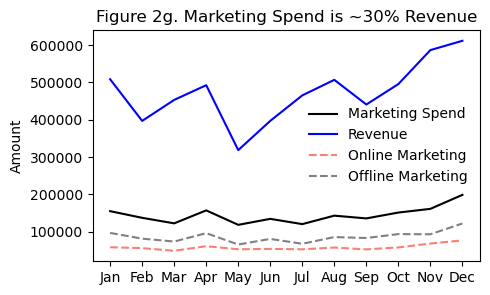

In [40]:
# How is revenue impacted by marketing spend?
marketing_spending_df['Date'] = pd.to_datetime(marketing_spending_df['Date'])
marketing_spending_df['month'] = marketing_spending_df['Date'].dt.month
marketing_monthly = marketing_spending_df.groupby('month')[['Offline_Spend','Online_Spend']].sum().reset_index()
marketing_monthly['marketing_total'] = marketing_monthly['Offline_Spend']+marketing_monthly['Online_Spend']


osct_revenue_summ = osct.groupby('Month_num')[['invoice_value']].sum().reset_index()

osct_revenue_marketing_summ = pd.merge(marketing_monthly, osct_revenue_summ, how='left', left_on='month', right_on='Month_num')
osct_revenue_marketing_summ['marketing_asPercOf_revenue'] = osct_revenue_marketing_summ['marketing_total']/osct_revenue_marketing_summ['invoice_value']
## I could melt it, but this is ok too...
plt.figure(figsize=(5,3))
sns.lineplot(osct_revenue_marketing_summ['marketing_total'], linestyle='-', color='black', label='Marketing Spend')
sns.lineplot(osct_revenue_marketing_summ['invoice_value'], linestyle='-', color='blue', label='Revenue')
sns.lineplot(osct_revenue_marketing_summ['Online_Spend'], linestyle='--', color='salmon', label='Online Marketing')
sns.lineplot(osct_revenue_marketing_summ['Offline_Spend'], linestyle='--', color='gray', label='Offline Marketing')
plt.ylabel("Amount")
plt.legend(frameon=False)
set_monthly_xticks(0)
plt.title("Figure 2g. Marketing Spend is ~30% Revenue")
display(osct_revenue_marketing_summ)

In [41]:
# Which products appeared on most transactions?
## Should I consider 'Product_SKU'
osct_products = osct[['Transaction_ID', 'Product_Description']].drop_duplicates().reset_index()

osct_products = osct_products.groupby(['Product_Description'])['Transaction_ID'].count().reset_index().sort_values(by='Transaction_ID', ascending=False)
osct_products.rename(columns={'Transaction_ID':'n_Transaction_IDs'}, inplace=True)
print("Table-3 Nest Thermostat Appeared on Most Transactions")
styled_df = osct_products[:10].style.hide(axis='index')
styled_df


Table-3 Nest Thermostat Appeared on Most Transactions


Product_Description,n_Transaction_IDs
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,3511
Nest Cam Outdoor Security Camera - USA,3328
Nest Cam Indoor Security Camera - USA,3230
Nest Protect Smoke + CO White Battery Alarm-USA,1361
Nest Learning Thermostat 3rd Gen-USA - White,1089
Nest Protect Smoke + CO White Wired Alarm-USA,1065
Nest Thermostat E - USA,844
Google Laptop and Cell Phone Stickers,806
Google Sunglasses,694
Google 22 oz Water Bottle,684


In [42]:
# Which product was purchased mostly based on the quantity?
osct_product_qty = osct[['Transaction_ID', 'Product_Description', 'Quantity']].drop_duplicates().reset_index()
osct_product_qty = osct_product_qty.groupby(['Product_Description'])['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print("Table-3 Maze pen is the Most Bought Item")
styled_df = osct_products[:10].style.hide(axis='index')
styled_df

Table-3 Maze pen is the Most Bought Item


Product_Description,n_Transaction_IDs
Nest Learning Thermostat 3rd Gen-USA - Stainless Steel,3511
Nest Cam Outdoor Security Camera - USA,3328
Nest Cam Indoor Security Camera - USA,3230
Nest Protect Smoke + CO White Battery Alarm-USA,1361
Nest Learning Thermostat 3rd Gen-USA - White,1089
Nest Protect Smoke + CO White Wired Alarm-USA,1065
Nest Thermostat E - USA,844
Google Laptop and Cell Phone Stickers,806
Google Sunglasses,694
Google 22 oz Water Bottle,684


## 3. Performing Customer Segmentation
- Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
- Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

### Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.
RFM Scores:
- Recency: Measure the time since the last purchase.
- Frequency: Count the number of purchases in a given period.
- Monetary: Calculate the total amount spent by the customer.

In [43]:

recency_cutoff = osct['Transaction_Date'].max()

In [44]:
# Calculate RFM scores
rfm = pd.DataFrame()
rfm['last_transaction'] = osct.groupby('CustomerID')['Transaction_Date'].max()
rfm['recency_days'] = (recency_cutoff - rfm['last_transaction']).dt.days
rfm['frequency'] = osct.groupby('CustomerID')['Transaction_Date'].count()
rfm['monetary'] = osct.groupby('CustomerID')['invoice_value'].sum()
rfm = rfm.reset_index()
## This needs to be reversed! as more days need lower value
rfm['r_score'] = pd.qcut(rfm['recency_days'], 5, labels=False)+1
rfm['f_score'] = pd.qcut(rfm['frequency'], 5, labels=False)+1
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=False)+1

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['sum_rfm'] = rfm['f_score'] + rfm['m_score'] - rfm['r_score']
rfm.head()


,CustomerID,last_transaction,recency_days,frequency,monetary,r_score,f_score,m_score,rfm_score,sum_rfm
0,12346,2019-09-15,107,2,185.6882,3,1,1,311,-1
1,12347,2019-11-02,59,60,16567.9470,2,5,5,255,8
2,12348,2019-10-19,73,23,1842.8708,2,3,3,233,4
3,12350,2019-12-14,17,17,1636.2142,1,3,3,133,5
4,12356,2019-09-15,107,36,2231.7198,3,4,3,343,4


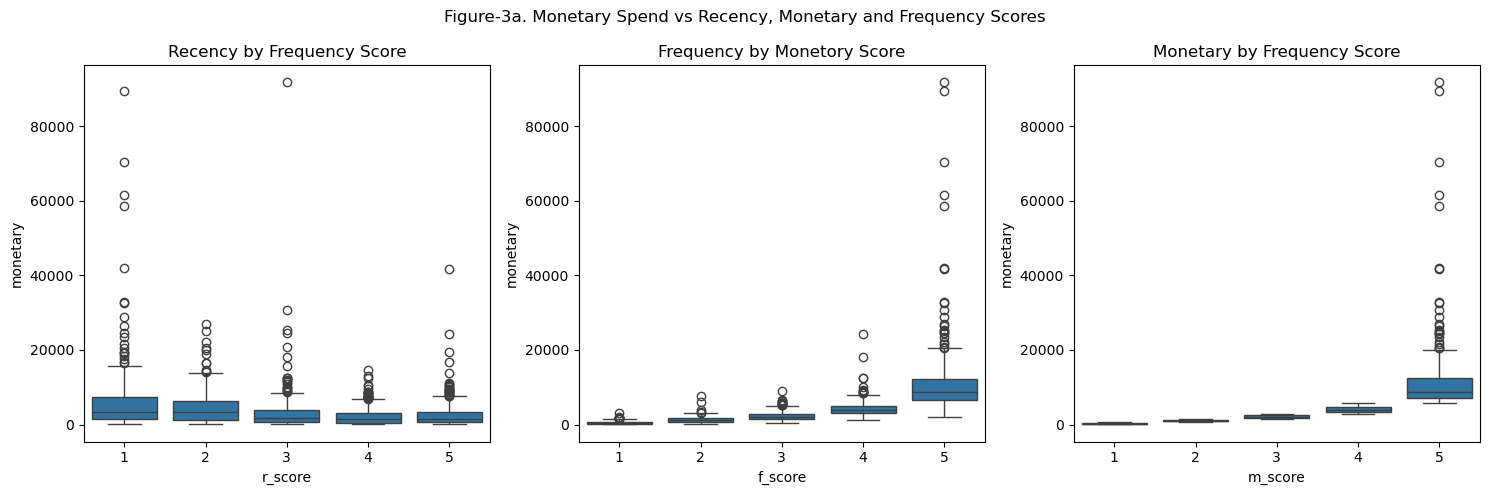

In [45]:
plt.figure(figsize=(15, 5))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=rfm, x='r_score', y='monetary')
plt.title('Recency by Frequency Score')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(data=rfm, x='f_score', y='monetary')
plt.title('Frequency by Monetory Score')

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data=rfm, x='m_score', y='monetary')
plt.title('Monetary by Frequency Score')
plt.suptitle("Figure-3a. Monetary Spend vs Recency, Monetary and Frequency Scores")
plt.tight_layout()
plt.show()

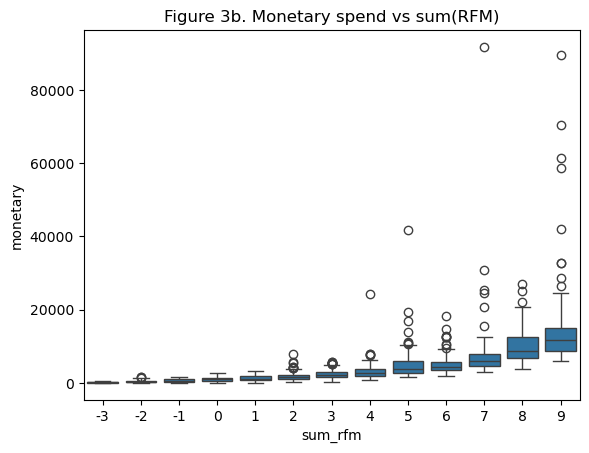

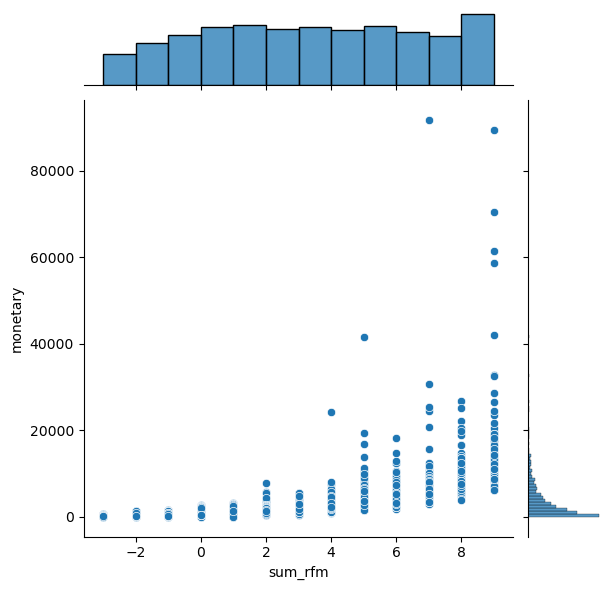

In [46]:
# Reshape the data for heatmap

sns.boxplot(data=rfm, x='sum_rfm', y='monetary')
plt.title("Figure 3b. Monetary spend vs sum(RFM)")
sns.jointplot(data=rfm, x='sum_rfm', y='monetary')
##plt.title("Figure 2b2. Monetary spend vs sum(RFM)")

In [47]:
rfm_agg = rfm.groupby('sum_rfm').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID':'nunique'
}).reset_index()

# Example heatmap for Recency, Frequency, and Monetary scores
print("Table-4. Heuristic Customer Score = sum(Recency,Frequency,Monetary); RFM")
display(rfm_agg)


Table-4. Heuristic Customer Score = sum(Recency,Frequency,Monetary); RFM


,sum_rfm,recency_days,frequency,monetary,CustomerID
0,-3,300.549296,2.563380,201.204096,71
1,-2,233.536842,4.894737,420.017939,95
2,-1,207.921053,8.035088,578.403562,114
3,0,178.781955,10.330827,978.691176,133
4,1,160.797101,13.942029,1208.887601,138
5,2,146.726562,17.367188,1811.118989,128
6,3,146.643939,25.090909,2446.708945,132
7,4,126.761905,30.976190,3191.962155,126
8,5,143.200000,47.266667,4989.230923,135
9,6,90.280992,50.247934,5228.398932,121


In [48]:
n_customers = osct['CustomerID'].nunique()

In [49]:
## Premium, Gold, Silver, Standard customers and define strategy on the same.
## Premium = top 1/20th spenders Plus they are clear outliers
## Gold and above = top 10%
## Silver >=8
## Standard else
rfm['rfm_segment'] = np.where(rfm['sum_rfm'] >= 9, "rfm_Premium", 
                          np.where(rfm['sum_rfm'] >= 7, "rfm_Gold",
                           np.where(rfm['sum_rfm'] >= 4, "rfm_Silver", "rfm_Standard")))
segment_order = ["rfm_Standard", "rfm_Silver", "rfm_Gold", "rfm_Premium"]
rfm['rfm_segment'] = pd.Categorical(rfm['rfm_segment'], categories=segment_order, ordered=True)
rfm.head()

,CustomerID,last_transaction,recency_days,frequency,monetary,r_score,f_score,m_score,rfm_score,sum_rfm,rfm_segment
0,12346,2019-09-15,107,2,185.6882,3,1,1,311,-1,rfm_Standard
1,12347,2019-11-02,59,60,16567.9470,2,5,5,255,8,rfm_Gold
2,12348,2019-10-19,73,23,1842.8708,2,3,3,233,4,rfm_Silver
3,12350,2019-12-14,17,17,1636.2142,1,3,3,133,5,rfm_Silver
4,12356,2019-09-15,107,36,2231.7198,3,4,3,343,4,rfm_Silver


In [50]:
rfm_summ = rfm.groupby('rfm_segment').agg({
                                        'recency_days': 'mean',
                                        'frequency': 'mean',
                                        'monetary': 'mean',
                                        'CustomerID':'nunique'
                                        }).reset_index()
rfm_summ['freq'] = rfm_summ['CustomerID']/n_customers
print("Table-5. Heuristic Customer Segmentation into Premium, Gold, Silver and Standard based on RFM")
display(rfm_summ)

Table-5. Heuristic Customer Segmentation into Premium, Gold, Silver and Standard based on RFM


,rfm_segment,recency_days,frequency,monetary,CustomerID,freq
0,rfm_Standard,186.601726,12.818742,1198.404967,811,0.552452
1,rfm_Silver,121.015707,42.837696,4472.171929,382,0.260218
2,rfm_Gold,65.376963,79.973822,8745.328647,191,0.130109
3,rfm_Premium,21.095238,129.630952,15751.332646,84,0.057221


### Scientific (Using K-Means) & Understand the profiles. Define strategy for each segment.

In [51]:
print(osct.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'base_invoice', 'price_with_discount',
       'discount_applied', 'tax_applied', 'invoice_value',
       'invoice_value_ifNoDiscount', 'Year', 'Month_num',
       'customer_acquisition_date', 'customer_acquisition_Month',
       'new_existing_this_month', 'week', 'day'],
      dtype='object')


In [52]:
osct_features = osct[['CustomerID','Avg_Price', 'Coupon_Status', 'Coupon_Code','Discount_pct', 'customer_acquisition_Month', 'day', 'Product_SKU', 'Quantity']]
osct_features['customer_tenure'] = 12- osct_features['customer_acquisition_Month']
osct_features.drop(columns = ['customer_acquisition_Month'], inplace=True)
osct_features = pd.merge(osct_features, customer_df, how='left', on='CustomerID')
osct_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       52924 non-null  int64  
 1   Avg_Price        52924 non-null  float64
 2   Coupon_Status    52924 non-null  object 
 3   Coupon_Code      4516 non-null   object 
 4   Discount_pct     52924 non-null  float64
 5   day              52924 non-null  int32  
 6   Product_SKU      52924 non-null  object 
 7   Quantity         52924 non-null  int64  
 8   customer_tenure  52924 non-null  int32  
 9   Gender           52924 non-null  object 
 10  Location         52924 non-null  object 
 11  Tenure_Months    52924 non-null  int64  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 4.4+ MB


In [53]:
osct_features_gp = osct_features.groupby(['CustomerID']).agg({
    'Avg_Price': 'mean',
    'Discount_pct':'mean',
    'day':'mean',
    'customer_tenure':'mean',
    'Tenure_Months':'mean',
    'Gender': lambda x: ', '.join(x.unique()),
    'Location':lambda x: ', '.join(x.unique())
}).reset_index()

## binary - Coupon_Status, Coupon_Code, 
osct_features_coupon_status = osct_features[['CustomerID','Coupon_Status']].groupby(['CustomerID','Coupon_Status']).size().reset_index(name='count')
osct_features_coupon_status = osct_features_coupon_status.pivot(index='CustomerID', columns='Coupon_Status', values='count').fillna(0)

osct_features_gp = pd.merge(osct_features_gp, osct_features_coupon_status, on='CustomerID', how='left')

osct_features_coupon_code = osct_features[['CustomerID','Coupon_Code']].groupby(['CustomerID','Coupon_Code']).size().fillna(0).reset_index(name='count')
osct_features_coupon_code = osct_features_coupon_code.pivot(index='CustomerID', columns='Coupon_Code', values='count').fillna(0).reset_index()


osct_features_gp = pd.merge(osct_features_gp, osct_features_coupon_code, on='CustomerID', how='left')

## Cant Use Product, it will overfit....
## OHE kind - 'Product_SKU','Quantity'
## osct_features_SKU = osct_features[['CustomerID','Product_SKU','Quantity']].groupby(['CustomerID','Product_SKU'])['Quantity'].sum().reset_index()
## osct_features_SKU = osct_features_SKU.pivot(index='CustomerID', columns='Product_SKU', values='Quantity').fillna(0).reset_index()
## osct_features_SKU

## osct_features_gp = pd.merge(osct_features_gp, osct_features_SKU, on='CustomerID', how='left')

osct_features_gp = pd.merge(osct_features_gp, rfm, how='left', on='CustomerID')

print(osct_features_gp.info())
object_column_names = osct_features_gp.select_dtypes(include=['object']).columns.tolist()
numeric_column_names = osct_features_gp.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_column_names.remove('CustomerID')
print(f"object columns={object_column_names}")
print(f"numeric columns={numeric_column_names}")
print(osct_features_gp.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        1468 non-null   int64         
 1   Avg_Price         1468 non-null   float64       
 2   Discount_pct      1468 non-null   float64       
 3   day               1468 non-null   float64       
 4   customer_tenure   1468 non-null   float64       
 5   Tenure_Months     1468 non-null   float64       
 6   Gender            1468 non-null   object        
 7   Location          1468 non-null   object        
 8   Clicked           1468 non-null   float64       
 9   Not Used          1468 non-null   float64       
 10  Used              1468 non-null   float64       
 11  ACC20             200 non-null    float64       
 12  AIO20             200 non-null    float64       
 13  AND20             200 non-null    float64       
 14  BT20              200 no

In [54]:
## osct_features_gp['GGOEWEBB082699'].value_counts(dropna=False)

In [55]:
osct_features_gp['ACC20'].value_counts(dropna=False)

ACC20
NaN    1268
0.0     194
1.0       6
Name: count, dtype: int64

In [56]:

## object_column_names
## numeric_column_names
print(osct_features_gp.shape)
index_cols = ['CustomerID']
print("osct_features_gp is ready for KMeans analysis")
columns_with_nan = osct_features_gp.columns[osct_features_gp.isna().any()].tolist()
columns_with_nan
osct_features_gp[columns_with_nan] = osct_features_gp[columns_with_nan].fillna(0)


(1468, 35)
osct_features_gp is ready for KMeans analysis


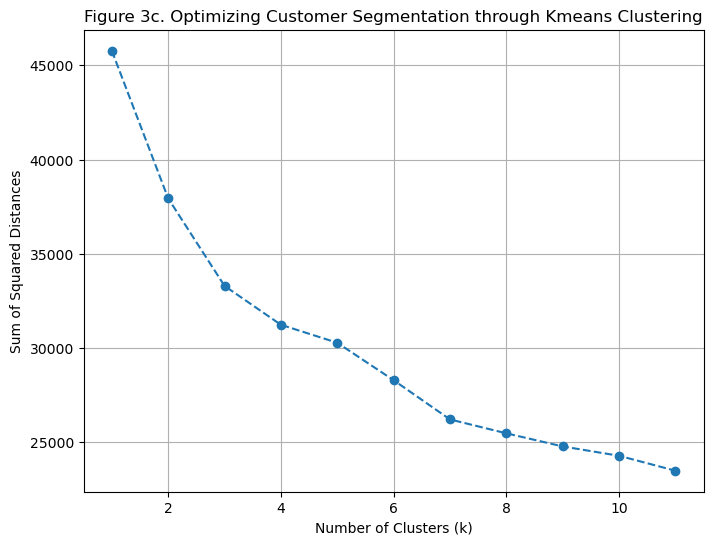

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Separate the numeric and categorical data
numeric_df = osct_features_gp[numeric_column_names]
categorical_df = osct_features_gp[object_column_names]

# Preprocess numeric data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Preprocess categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_column_names),
        ('cat', categorical_transformer, object_column_names)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(osct_features_gp)

# Determine the number of clusters using the Elbow Method
# Calculate the sum of squared distances for different values of k (number of clusters)
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters

plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
##plt.title("It is a reverse elbow!")
plt.title("Figure 3c. Optimizing Customer Segmentation through Kmeans Clustering")

plt.grid(True)
plt.show()

In [58]:
osct_features['CustomerID'].nunique()

1468

In [59]:
osct['CustomerID'].nunique()

1468

In [60]:
# Based on Figure-3c and requirements to make 4 categories
# for most Combinational Advantages of Using 7 K-means Categories Over 4')
## The steep drop after elbow may suggest overfitting, maybe as I have too many sparce features
## It needs a PCA but for now I will omit it as I am in a hurry

# K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
osct_features_gp['Cluster'] = kmeans.fit_predict(X)

selected_columns = ['recency_days', 'frequency', 'monetary']
cluster_means = osct_features_gp.groupby(['Cluster']).agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID':'nunique'
}).reset_index()
print(osct_features_gp['CustomerID'].nunique())
print(cluster_means['CustomerID'].sum())
cluster_means.rename(columns = {'CustomerID': 'n_customers'}, inplace=True)
cluster_means['freq'] = cluster_means['n_customers']/n_customers
cluster_means = cluster_means.sort_values(by='monetary', ascending=False)
print("Table-6. Segmentation into 7 Clusters to get most Combinational Advantage")
display(cluster_means)

1468
1468
Table-6. Segmentation into 7 Clusters to get most Combinational Advantage


,Cluster,recency_days,frequency,monetary,n_customers,freq
6,6,27.428571,519.000000,62440.152957,7,0.004768
3,3,69.901235,86.312757,9722.937501,243,0.165531
5,5,149.550000,112.450000,9468.408386,20,0.013624
4,4,155.967742,64.838710,5707.110930,62,0.042234
1,1,228.338182,36.640000,3958.009192,275,0.187330
0,0,56.300716,19.778043,2279.112939,419,0.285422
2,2,216.287330,8.337104,650.183350,442,0.301090


In [61]:
cluster_means = osct_features_gp.groupby(['Cluster', 'rfm_segment']).agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'CustomerID':'nunique'
}).reset_index()
cluster_means.rename(columns = {'CustomerID': 'n_customers'}, inplace=True)
cluster_means['freq'] = cluster_means['n_customers']/n_customers
cluster_means = cluster_means.sort_values(by='monetary', ascending=False)

print("Table-7. RFM segmentation has decent correlation to Kmeans Segmentation")
display(cluster_means[cluster_means['n_customers']>0])

Table-7. RFM segmentation has decent correlation to Kmeans Segmentation


,Cluster,rfm_segment,recency_days,frequency,monetary,n_customers,freq
26,6,rfm_Gold,107.000000,695.000000,91721.242580,1,0.000681
27,6,rfm_Premium,14.166667,489.666667,57559.971353,6,0.004087
23,5,rfm_Premium,16.500000,225.500000,23075.110070,2,0.001362
19,4,rfm_Premium,23.000000,117.833333,12365.268310,6,0.004087
15,3,rfm_Premium,21.657143,97.042857,12248.718345,70,0.047684
22,5,rfm_Gold,96.875000,126.500000,10668.384798,8,0.005450
18,4,rfm_Gold,85.750000,103.625000,9874.579573,16,0.010899
14,3,rfm_Gold,71.425197,82.236220,8904.464051,127,0.086512
13,3,rfm_Silver,139.108696,81.239130,8139.056393,46,0.031335
21,5,rfm_Silver,216.555556,81.444444,6147.893569,9,0.006131


### Define strategies for each segment based on their profiles  

- Heuristically there were four kinds of customers and I divided them up by spending to get 5% in Premium, 13% in Gold, 26% in the Silver category and 55% in the standard category.
These were also segmented well by spend with Premium spending above 15k, Gold spending above 7.5k, Silver spending above 3k and the rest being standard. These results are based on Table-4 and Table-5  

- KMeans further helped us identify spenders with various behaviours to target (Table-7). They are mostly in line with the heuristic model (Table-6) but more detailed in separating frequency, recency and monetary behaviours.  

__Cluster 0: Very Recent, High Frequency, Low Monetary__    
Recency: 56.30 days Frequency: 19.78 Monetary: $2279.11  
Strategy:  
_Loyalty Programs:_ Develop a loyalty program to increase the monetary value per purchase.  
Upsell/Cross-sell: Target these customers with upsell and cross-sell opportunities to increase their average spend.  

__Cluster 1: Moderate Recency, Medium Frequency, Moderate Monetary__    
Recency: 228.34 days Frequency: 36.64 Monetary: $3958.01  
Strategy:  
_Retention Campaigns:_ Focus on retaining these customers with personalized offers and special promotions.  
_Exclusive Offers:_ Provide exclusive deals to keep them engaged and encourage higher spending.  

__Cluster 2: Very Recent, Low Frequency, Low Monetary__  
Recency: 216.29 days Frequency: 8.34 Monetary: $650.18  
Strategy:  
_Reactivation:_ Implement reactivation campaigns to encourage more frequent purchases.  
_Incentives:_ Offer incentives for increasing purchase frequency, such as discounts or rewards.  

__Cluster 3: Moderate Recency, High Frequency, Low Monetary__  
Recency: 69.90 days Frequency: 86.31 Monetary: $9722.94  
Strategy:  
_Increase Spend:_ Create promotions that encourage higher spending per transaction.  
_Engagement Programs:_ Develop programs to boost the average transaction value.  

__Cluster 4: Older Recency, Low Frequency, Medium Monetary__  
Recency: 155.97 days Frequency: 64.84 Monetary: $5707.11  
Strategy:  
_Boost Frequency:_ Launch campaigns to increase purchase frequency, possibly through subscription or frequent buyer programs.  
_Seasonal Promotions:_ Target with seasonal promotions to boost engagement.  

__Cluster 5: Recent Recency, Low Frequency, Low Monetary__  
Recency: 149.55 days Frequency: 112.45 Monetary: $9468.41  
Strategy:  
_Encourage Frequency:_ Use targeted promotions to increase purchase frequency.  
_Feedback and Surveys:_ Engage with these customers to understand barriers to frequent purchases.  

__Cluster 6: Very Recent, Low Frequency, High Monetary__  
Recency: 27.43 days Frequency: 519.00 Monetary: $62440.15    
Strategy:  
_High-Touch Engagement:_ Implement high-touch, personalized engagement strategies to maintain and increase their loyalty.  
_Premium Offers:_ Provide exclusive, premium offers to enhance their experience and encourage repeat purchases.  


## 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
- First define dependent variable with categories low value, medium value, high value using customer revenue.
- Then perform Classification model

In [62]:
## monetory is sum of invoices!
## osct_features_gp
low_threshold = osct_features_gp['monetary'].quantile(0.33)
high_threshold = osct_features_gp['monetary'].quantile(0.67)
print(low_threshold, high_threshold)
osct_features_gp['customer_value'] = np.where(osct_features_gp['monetary'] < low_threshold, "low_value",
                                              np.where(osct_features_gp['monetary'] < high_threshold, "medium_value", "high_value"))
## osct_features_gp.head()                                     

1145.3516290000002 3652.4598766000004


In [63]:
# Sort data by CustomerID and Transaction_Date
osct_transaction_freq = osct.sort_values(by=['CustomerID', 'Transaction_Date'])

# Calculate the difference in days between consecutive purchases
osct_transaction_freq['Days_Between_Purchases'] = osct_transaction_freq.groupby('CustomerID')['Transaction_Date'].diff().dt.days

osct_transaction_freq = osct_transaction_freq.groupby('CustomerID')['Days_Between_Purchases'].mean().reset_index()
osct_transaction_freq.rename(columns={'Days_Between_Purchases': 'Avg_Days_Between_Purchases'}, inplace=True)

osct_transaction_freq = pd.merge(osct_transaction_freq, osct_features_gp, on='CustomerID', how='left')

## display(osct_transaction_freq)


## 5. Cross-Selling (Which products are selling together)
- You can perform exploratory analysis & market basket analysis to understand which of items can be bundled together.

In [64]:
online_sales_df['Product_Description'] = online_sales_df['Product_Description'].str.strip().str.replace(' ','_')
unique_products = online_sales_df['Product_Description'].unique()

In [65]:
## most sold item
online_sales_qty = online_sales_df[['Product_SKU','Product_Description','Quantity']].groupby(['Product_SKU','Product_Description'])['Quantity'].sum().reset_index()
online_sales_qty.sort_values(by='Quantity', ascending=False, inplace=True)
print("Table-8. 10 most sold items")
display(online_sales_qty.head(10))

Table-8. 10 most sold items


,Product_SKU,Product_Description,Quantity
914,GGOEGGOA017399,Maze_Pen,16234
880,GGOEGDHC018299,Google_22_oz_Water_Bottle,9728
854,GGOEGBMJ013399,Sport_Bag,7321
969,GGOEGOLC014299,Google_Metallic_Notebook_Set,6496
904,GGOEGFKQ020399,Google_Laptop_and_Cell_Phone_Stickers,5847
907,GGOEGFSR022099,Google_Kick_Ball,5549
983,GGOENEBQ078999,Nest_Cam_Outdoor_Security_Camera_-_USA,5206
908,GGOEGFYQ016599,Foam_Can_and_Bottle_Cooler,5098
942,GGOEGOAQ012899,Ballpoint_LED_Light_Pen,4861
981,GGOENEBJ079499,Nest_Learning_Thermostat_3rd_Gen-USA_-_Stainle...,4570


In [66]:
## bought by most individuals
online_sales_perPerson_qty = online_sales_df[['CustomerID','Product_SKU','Product_Description','Quantity']].drop_duplicates()
online_sales_perPerson_qty = online_sales_perPerson_qty.groupby(['Product_SKU','Product_Description'])['CustomerID'].count().reset_index()
online_sales_perPerson_qty.rename(columns={'CustomerID':'n_customers'}, inplace=True)
online_sales_perPerson_qty.sort_values(by='n_customers', ascending=False, inplace=True)
print("Table-9. Top 10 items bought by most people")
display(online_sales_perPerson_qty.head(10))

Table-9. Top 10 items bought by most people


,Product_SKU,Product_Description,n_customers
983,GGOENEBQ078999,Nest_Cam_Outdoor_Security_Camera_-_USA,1664
976,GGOENEBB078899,Nest_Cam_Indoor_Security_Camera_-_USA,1448
981,GGOENEBJ079499,Nest_Learning_Thermostat_3rd_Gen-USA_-_Stainle...,1426
984,GGOENEBQ079099,Nest_Protect_Smoke_+_CO_White_Battery_Alarm-USA,1012
985,GGOENEBQ079199,Nest_Protect_Smoke_+_CO_White_Wired_Alarm-USA,860
904,GGOEGFKQ020399,Google_Laptop_and_Cell_Phone_Stickers,668
989,GGOENEBQ084699,Nest_Learning_Thermostat_3rd_Gen-USA_-_White,663
880,GGOEGDHC018299,Google_22_oz_Water_Bottle,541
992,GGOENEBQ086799,Nest_Thermostat_E_-_USA,446
922,GGOEGHPB071610,Google_Twill_Cap,435


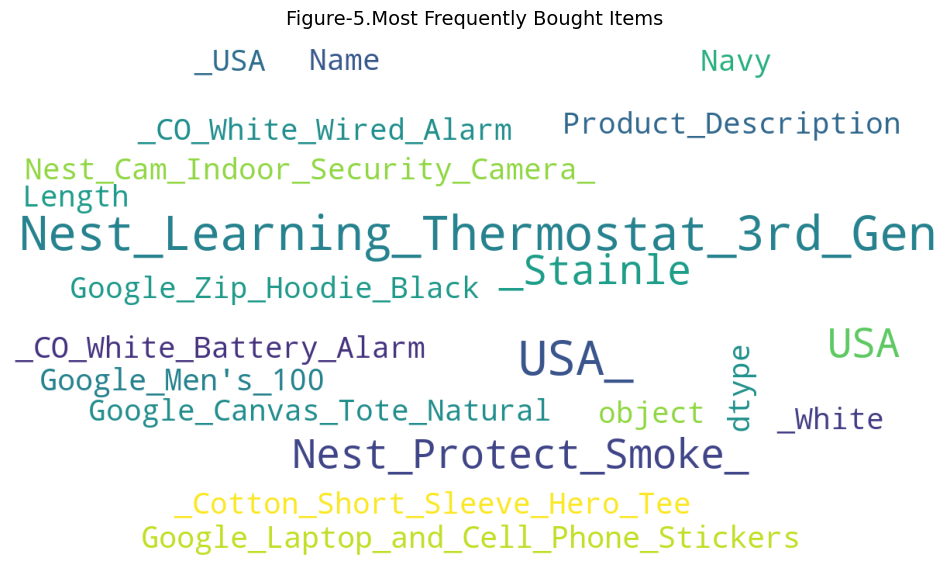

In [67]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (12, 8)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 700, max_words = 121).generate(str(online_sales_df['Product_Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Figure-5.Most Frequently Bought Items',fontsize = 14)
plt.show()

### Market basket analysis: data mining technique to understand customer purchasing patterns. 

1. Which items are frequently bought together?
2. If a user buys an item X, which item is he/she likely to buy next?

In [68]:
## Make it in wide format
## I believe SKUs change but Product_Description is more informative
basket = (online_sales_df.groupby(['Transaction_ID', 'Product_Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID'))
## basket.describe()

In [69]:
#We are getting the quantity ordered while we just want a binary coding to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    return True if x >= 1 else False


basket_binary = basket.applymap(encode_units)
## basket_binary.describe()

In [70]:
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter

In [71]:
# A function where we pass an item (X) and it returns the items (Yi) which are frequently bought together

def frequently_inTransaction_together(item, basket = basket_binary):
    item_df = basket[basket[item].eq(True)]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules_sorted = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    # Filter to get top 6 rules and relevant columns
    top_rules = rules_sorted.head(6)[['antecedents', 'consequents', 'support', 'lift']]
    
    # Print the top items frequently bought together
    ##print(f'Items frequently bought together with {item}:')
    ## print(top_rules)
    
    return top_rules

In [72]:
item = 'Google_Laptop_and_Cell_Phone_Stickers'
print(f"Table-10. Example Result for items bought with {item}.")
display(frequently_inTransaction_together(item))

Table-10. Example Result for items bought with Google_Laptop_and_Cell_Phone_Stickers.


,antecedents,consequents,support,lift
0,(Google_Laptop_and_Cell_Phone_Stickers),(YouTube_Custom_Decals),0.166253,1.0
1,(YouTube_Custom_Decals),(Google_Laptop_and_Cell_Phone_Stickers),0.166253,1.0
2,(Google_Laptop_and_Cell_Phone_Stickers),(Google_Doodle_Decal),0.152605,1.0
3,(Google_Doodle_Decal),(Google_Laptop_and_Cell_Phone_Stickers),0.152605,1.0


### Support and Lift

- Support: Measures how frequently an item or itemset appears in the dataset.  

Support(A) = Number of transactions containing A / Total number of transactions  

- Lift: Measures how much more likely two items are bought together compared to being bought independently.  
Lift(A → B) = Support(A and B) / (Support(A) × Support(B))  

Lift > 1: Items are more likely to be bought together.  
Lift = 1: Items are bought together as expected by chance.  
Lift < 1: Items are less likely to be bought together.  

In [73]:
## take a list of top 100 items by sale and by individual interest (Table-8,9resp)

online_sales_qty_top50 = online_sales_qty['Product_Description'][:50].to_list()
online_sales_perPerson_qty_top50 =  online_sales_perPerson_qty['Product_Description'][:50].to_list()

items = online_sales_qty_top50+online_sales_perPerson_qty_top50
items = set(items)
len(items)
## online_sales_qty
## online_sales_perPerson_qty
##online_sales_qty['Product_Description'][:50]
## there are 1100 products
## online_sales_qty

59

In [74]:
results = []
for item in items:
    result = frequently_inTransaction_together(item)
    results.append(result)

In [75]:
results_cleaned = [df.dropna(axis=1, how='all') for df in results]
all_results = pd.concat(results_cleaned, axis=0)
all_results.sort_values(by='lift', ascending=False)
all_results.to_csv("frequently_bought_together.csv")
pd.set_option('display.max_colwidth', None)
print(f'Table-11. Result for items bought Together (also see "frequently_bought_together.csv").')
display(all_results)

Table-11. Result for items bought Together (also see "frequently_bought_together.csv").


,antecedents,consequents,support,lift
0,(Colored_Pencil_Set),(Pen_Pencil_&_Highlighter_Set),0.271186,1.0
1,(Pen_Pencil_&_Highlighter_Set),(Colored_Pencil_Set),0.271186,1.0
2,(Google_Laptop_and_Cell_Phone_Stickers),(Pen_Pencil_&_Highlighter_Set),0.220339,1.0
3,(Pen_Pencil_&_Highlighter_Set),(Google_Laptop_and_Cell_Phone_Stickers),0.220339,1.0
4,(Google_Sunglasses),(Pen_Pencil_&_Highlighter_Set),0.211864,1.0
...,...,...,...,...
1,(Color_Changing_Grip_Pen),(Maze_Pen),0.244186,1.0
2,(Google_Laptop_and_Cell_Phone_Stickers),(Color_Changing_Grip_Pen),0.232558,1.0
3,(Color_Changing_Grip_Pen),(Google_Laptop_and_Cell_Phone_Stickers),0.232558,1.0
4,(Google_22_oz_Water_Bottle),(Color_Changing_Grip_Pen),0.220930,1.0


- Support: max here = 0.388298: This means that the item or itemset appears in approximately 38.83% of the transactions. This is a relatively high support value, indicating that the item or itemset is common in the dataset.
- Lift = 1: A lift value of 1 indicates that the items are bought together exactly as expected if they were independent of each other. In other words, there is no additional association between the items beyond what would be expected by chance.

In [76]:
## can apply mlxtend.frequent_patterns also for basket analysis

## 6. Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60days, 60-90 days, 90+ days)
- For this, we need create dependent variable at customer level (average days per one transaction for only repeat customers and divide into groups 0-30 days, 30-60 days, 60-90 days and 90+ days) then build classification model to predict next purchase of given customer.

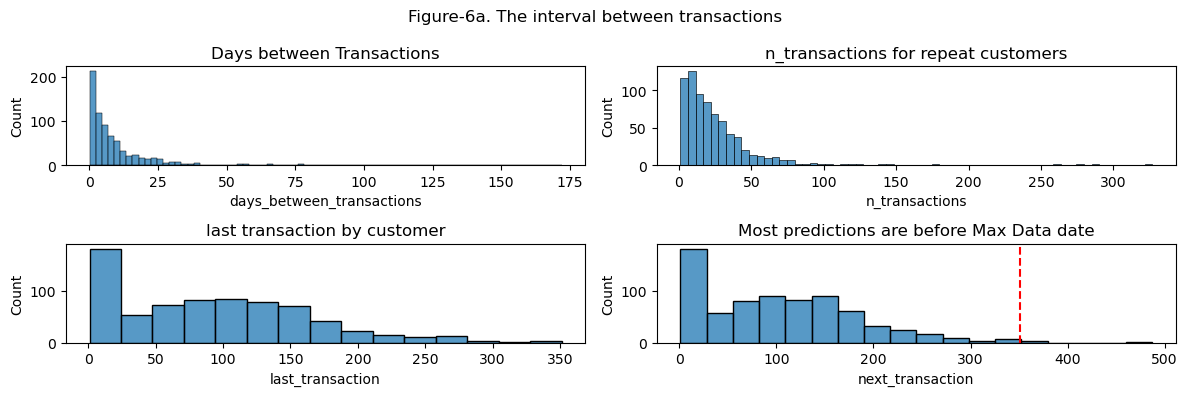

This needs more thought


In [77]:
## narrow down to repeat customers

osct_repeat_summ = osct[['CustomerID', 'Transaction_Date','customer_acquisition_Month']].groupby(['customer_acquisition_Month','CustomerID'])['Transaction_Date'].agg({'min','max'}).reset_index()
osct_repeat_summ['repeat_customer'] = np.where(osct_repeat_summ['max'].dt.dayofyear > osct_repeat_summ['min'].dt.dayofyear, "repeat", "one_time")
osct_repeat_customers = osct_repeat_summ[osct_repeat_summ['repeat_customer'] == 'repeat']
osct_repeat_customers_only = osct[osct['CustomerID'].isin(osct_repeat_customers['CustomerID'])][['CustomerID','Transaction_ID','Transaction_Date']]

osct_repeat_customers_only['dayofyear'] = osct_repeat_customers_only['Transaction_Date'].dt.dayofyear
##osct_repeat_customers_only.drop(columns = ['Transaction_ID'], inplace=True)
osct_repeat_customers_only = osct_repeat_customers_only.sort_values(by=['CustomerID', 'dayofyear']).drop_duplicates()
osct_repeat_customers_only['Days_Between_Transactions'] = osct_repeat_customers_only.groupby('CustomerID')['dayofyear'].diff()
osct_repeat_customers_only = osct_repeat_customers_only[osct_repeat_customers_only['Days_Between_Transactions'].notna()]

osct_daysbetweentransactions = osct_repeat_customers_only.groupby(['CustomerID'])['Days_Between_Transactions'].agg({'mean', 'count','max', 'std'}).reset_index()

osct_daysbetweentransactions.rename(columns = {'mean':'days_between_transactions', 
                                                'count': 'n_transactions', 
                                                'max':'last_transaction', 
                                                'std':'standard_deviation'}, inplace=True)
plt.figure(figsize=(12,4))
plt.subplot(2,2,1)
sns.histplot(osct_daysbetweentransactions['days_between_transactions'])
plt.title("Days between Transactions")
plt.subplot(2,2,2)
sns.histplot(osct_daysbetweentransactions['n_transactions'])
plt.title("n_transactions for repeat customers")

plt.subplot(2,2,3)
sns.histplot(osct_daysbetweentransactions['last_transaction'])
plt.title("last transaction by customer")

osct_max_Transaction_date = osct.groupby(['CustomerID'])['Transaction_Date'].max().reset_index()
osct_next_Transaction_date = pd.merge(osct_daysbetweentransactions, osct_max_Transaction_date, how='left', on='CustomerID')
osct_next_Transaction_date['next_transaction'] = osct_next_Transaction_date['last_transaction'] + osct_next_Transaction_date['days_between_transactions']
osct_next_Transaction_date

plt.subplot(2,2,4)
sns.histplot(osct_next_Transaction_date['next_transaction'])
plt.title("Most predictions are before Max Data date")
# Add vertical line for today's date (in days from the first transaction date)
plt.axvline(x=osct_next_Transaction_date['last_transaction'].max(), color='red', linestyle='--')
plt.suptitle("Figure-6a. The interval between transactions")
plt.tight_layout()
plt.show()
print(f"This needs more thought")

Text(0.5, 1.0, 'Figure-6b. Classification Based on Interval between transactions')

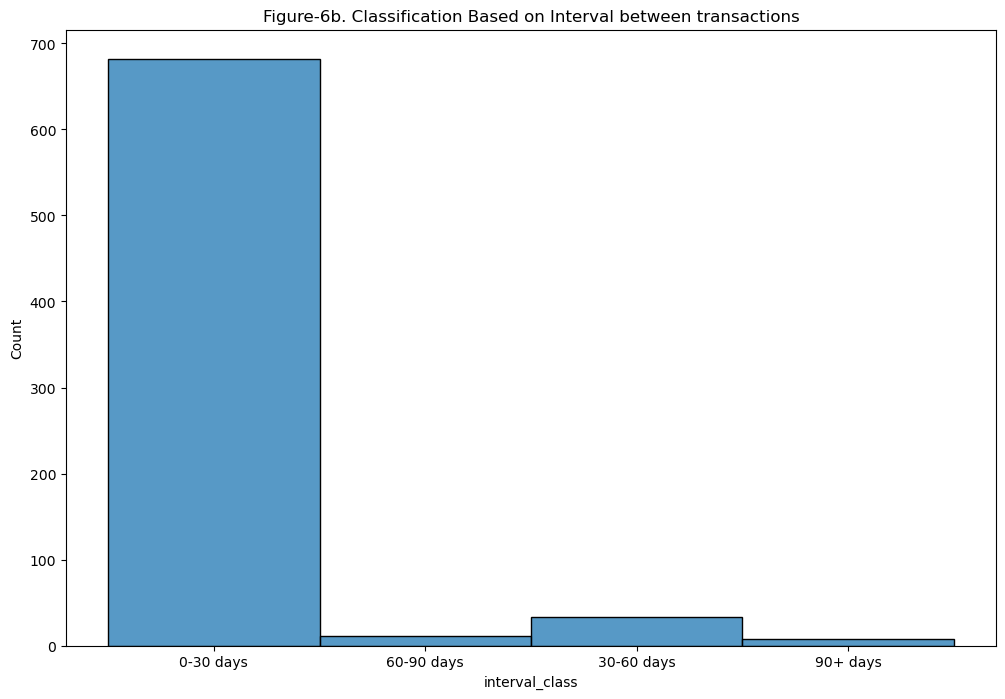

In [78]:
## Classification: 0-30 days, 30-60days, 60-90 days, 90+ d
osct_daysbetweentransactions["interval_class"] = np.where(osct_daysbetweentransactions["days_between_transactions"] <= 30, "0-30 days",
                                                          np.where(osct_daysbetweentransactions["days_between_transactions"] <= 60, "30-60 days",
                                                                   np.where(osct_daysbetweentransactions["days_between_transactions"] <= 90, "60-90 days", "90+ days")))

sns.histplot(osct_daysbetweentransactions["interval_class"])
plt.title("Figure-6b. Classification Based on Interval between transactions")

__With this data I dont believe we can make any further predictions worth using.__

## 7. Perform cohort analysis by defining below cohorts
- Customers who started in each month and understand their behaviour
- Which Month cohort has maximum retention?

In [79]:
## data is from one year only so Month_num column in osct is perfect

##display(osct_repeat_summ.head())
repeat_rate = osct_repeat_summ['repeat_customer'].value_counts(dropna=False)
display(pd.DataFrame(repeat_rate))
print(f"Table-11. The repeat rate is = {repeat_rate.iloc[0]*100/(repeat_rate.iloc[0]+repeat_rate.iloc[1])}%. Meaning that this frequency of customers came back for a purchase on a different day.")

,count
repeat_customer,
repeat,734
one_time,734


Table-11. The repeat rate is = 50.0%. Meaning that this frequency of customers came back for a purchase on a different day.


In [80]:
## per month cohort repeat rate is 
osct_perCohortRepeat = osct_repeat_summ.groupby(['customer_acquisition_Month','repeat_customer']).size().reset_index(name='count')
osct_perCohortRepeat = osct_perCohortRepeat.pivot(index='customer_acquisition_Month', columns='repeat_customer', values='count').reset_index()
osct_perCohortRepeat['sum'] = osct_perCohortRepeat['one_time'] + osct_perCohortRepeat['repeat']
osct_perCohortRepeat['cohort_repeat_rate'] = (osct_perCohortRepeat['one_time']*100/osct_perCohortRepeat['sum']).round(1)
print("Table-13. December (Month=12) has the maximum repeat rate of 75.6%")
display(osct_perCohortRepeat)
print("NB: Also see customer acquision and customer retention Figures - (2a and 2b)")

Table-13. December (Month=12) has the maximum repeat rate of 75.6%


repeat_customer,customer_acquisition_Month,one_time,repeat,sum,cohort_repeat_rate
0,1,82,133,215,38.1
1,2,17,79,96,17.7
2,3,57,120,177,32.2
3,4,68,95,163,41.7
4,5,51,61,112,45.5
5,6,70,67,137,51.1
6,7,52,42,94,55.3
7,8,83,52,135,61.5
8,9,59,19,78,75.6
9,10,59,28,87,67.8


NB: Also see customer acquision and customer retention Figures - (2a and 2b)


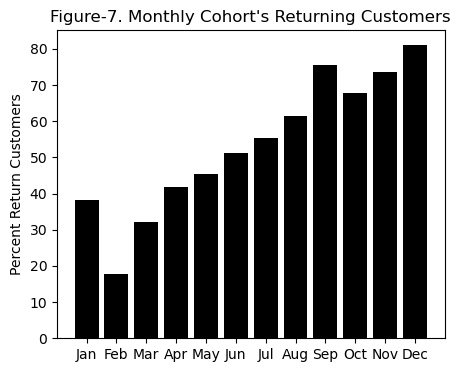

In [81]:
fig, ax1 = plt.subplots(figsize=(5,4))

plt.bar(osct_perCohortRepeat['customer_acquisition_Month'], osct_perCohortRepeat['cohort_repeat_rate'], color='black')

plt.ylabel("Percent Return Customers")
plt.title("Figure-7. Monthly Cohort's Returning Customers")

set_monthly_xticks(1)

### Calculated on a daily basis December cohort had the most returning customers.